<a href="https://colab.research.google.com/github/joseunghan/-/blob/main/%EC%8B%A4%EC%8A%B5_2%EC%B0%A8%EC%8B%9C(%EC%A1%B0%EC%8A%B9%ED%95%9C).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 실습 2차시 - 결정 트리(Decision Tree)

학번 이름: 2018130411 조승한

기한: 2022년 10월 11일 화요일 오후 1시 59분



In [1]:
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 21.4 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=ff68b44abb2a18d29db9f2a0e9eb12189713a70c76308318993e0bed41522ed1
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


# 지니 불순도 (Gini Impurity)

지니 불순도는 결정 트리의 분할기준 중 하나입니다.

아래 두개의 트리를 살펴봅시다.



<img src=https://s3.amazonaws.com/codecademy-content/programs/data-science-path/decision-trees/comparison_1.svg width=300px><img src=https://s3.amazonaws.com/codecademy-content/programs/data-science-path/decision-trees/comparison_2.svg width=300px>

둘 중 어느 트리가 학생이 성적을 더 높게 받을 수 있을지 예측하는데 유용할까요?

이 질문은 한 세트의 instance 들에 대해 `지니 불순도` 를 계산함으로써 답할 수 있습니다. 지니 불순도를 찾기 위해서는 `1`에서 시작해서 세트의 각 class 비율의 제곱을 빼면 됩니다. 

$$\text{Gini Impurity}  = 1 - \text{Gini Index} \\ = 1 - \sum_{i=1}^{K}p_{i}^{2}$$

위 식에서 $K$은 class label의 개수이며, $p_i$은 $i$번째 class label의 비율입니다.

예를 들어, `A` class인 instance가 3개 있고 `B` class인 instance가 1개 있는 데이터의 경우에는 지니 불순도는 아래와 같이 계산됩니다. 

$$1 - (3/4)^2 - (1/4)^2 = 0.375$$

만약 데이터가 하나의 class만 있다면, 지니 불순도는 `0`이 됩니다. 불순도가 낮으면 낮을수록 결정 트리의 성능은 더 좋아집니다.

## 활동 1

In [2]:
# 위 그림의 왼쪽 결정트리의, 왼쪽 끝마디 노드의 지니 불순도를 계산해봅시다.
1 - (4/6)**2 - (2/6)**2

0.4444444444444445

아래의 `sample_labels` 리스트의 지니 불순도를 계산해봅니다.


In [3]:
sample_labels = ["unacc", "unacc", "acc", "acc", "good", "good"]
impurity = 1

2. 이제 sample labels에 포함되어있는 class가 각 몇개씩 들어있는지 세어봅니다.

In [43]:
from collections import Counter

label_counts = Counter(sample_labels)

print(label_counts)

Counter({'unacc': 2, 'acc': 2, 'good': 2})


3. 데이터셋에서 각 `label`의 확률을 계산해봅니다.

In [44]:
for label in label_counts:
  print(label)
  probability_of_label = label_counts[label] / len(sample_labels)
  print(probability_of_label)

unacc
0.3333333333333333
acc
0.3333333333333333
good
0.3333333333333333


4. 그리고 그 확률을 이용하여 `sample_labels`의 불순도를 계산해봅니다.

In [45]:
for label in label_counts:
  # print(label)
  probability_of_label = label_counts[label] / len(sample_labels)
  impurity -= probability_of_label**2
  # print(probability_of_label)
print(impurity)

0.6666666666666665


5. 지니 불순도를 계산하는 위 코드를 함수로 만듭니다.

In [46]:
def gini(dataset):
  impurity = 1
  label_counts = Counter(dataset)
  for label in label_counts:
    prob_of_label = label_counts[label] / len(dataset)
    impurity -= prob_of_label ** 2
  return impurity

# 정보증가량 (Information Gain)

이제 지니 불순도가 낮은 끝마디(leaf node)를 만들기 위해서 어떠한 feature에 따라 데이터를 나누어야하는지 결정해야 합니다. 

예를 들어, 학생들의 수면 시간 또는 학생들의 공부 시간 둘 중 어느 feature을 기준으로 학생들을 나누어야 더 좋은 tree를 만들 수 있을까요?

위 질문에 답하기 위해 어떠한 feature에 대하여 데이터를 나누었을 때의 `정보증가량`을 계산해야 합니다. 

정보증가량은 데이터 분할 전과 후의 불순도 차이를 측정합니다. 

예를 들어, 불순도가 `0.5`인 데이터를 어떠한 feature에 대해 나누었을 때, 불순도가 각각 `0`, `0.375`, `0` 인 끝마디가 생긴다고 가정해봅니다.

<img src=https://s3.amazonaws.com/codecademy-content/programs/data-science-path/decision-trees/info.svg width=300px>

 이 경우에 데이터를 나누는 정보증가량은 `0.5 - 0 - 0.375 - 0 = 0.125` 입니다.

데이터를 나누었을때의 정보 증가량은 양수입니다. 따라서, 위처럼 결정 지점을 나눈 것은 결과적으로 불순도를 낮추었기 때문에 좋은 결정 지점입니다.

정보증가량은 크면 클수록 좋습니다. 

## 활동 2

1. 아래는 `unsplit_labels`라는 임의의 데이터입니다. `unsplit_labels`을 두가지 다른 분할 지점으로 나누었습니다. 이는 `split_labels_1`와 `split_labels_2` 입니다. 각 분할에 대해 information gain을 계산해봅니다.

In [11]:
unsplit_labels = ["unacc", "unacc", "unacc", "unacc", "unacc", "unacc", "good", 
                  "good", "good", "good", "vgood", "vgood", "vgood"]

split_labels_1 = [["unacc", "unacc", "unacc", "unacc", "unacc", "unacc", "good", "good", "vgood"], 
                  [ "good", "good"], 
                  ["vgood", "vgood"]]

split_labels_2 = [["unacc", "unacc", "unacc", "unacc","unacc", "unacc", "good", "good", "good", "good"], 
                  ["vgood", "vgood", "vgood"]]

In [47]:
# unsplit_labels의 지니 불순도를 계산해봅니다.
info_gain_1 = gini(unsplit_labels)
info_gain_1

0.6390532544378698

2. `split_labels_1`의 각 부분집합에 대하여 지니 불순도을 계산하여 정보 증가량을 계산해봅니다.

In [48]:
for subset in split_labels_1:
  info_gain_1 -= gini(subset)
print(info_gain_1)

0.14522609394404257


3. `split_labels_2`에 대해서도 동일한 방법으로 정보증가량을 계산해봅니다.

In [49]:
info_gain_2 = gini(unsplit_labels)
for subset in split_labels_2:
  info_gain_2 -= gini(subset)
print(info_gain_2)

0.15905325443786977


4. 정보증가량을 계산하는 함수를 만들어봅니다.

In [50]:
def information_gain(starting_labels, split_labels):
  info_gain = gini(starting_labels)
  for subset in split_labels:
    info_gain -= gini(subset)
  return info_gain

# 가중 정보증가량 (Weighted Information Gain)

만약 정보증가량이 `0`이라면 그 feature에 대해 데이터를 나누는 것은 소용이 없습니다. 때에 따라서 데이터를 나누었을 때 정보증가량이 음수가 될 수 있습니다. 이 문제를 해결하기 위해서 가중 정보증가량 (weighted information gain)을 사용합니다.

분할 후에 생성되는 데이터의 부분집합의 크기 또한 중요합니다. 예를 들어서, 아래 이미지에서는 불순도가 같은 두 부분집합이 있습니다. 

<img src=https://s3.amazonaws.com/codecademy-content/programs/data-science-path/decision-trees/impurity-0.svg width=300px>

어느 부분집합을 결정 트리의 끝마디로 정하는게 좋은 결정트리를 만들 수 있을까요?

두 부분집합은 모두 불순도가 0으로써 완전하지만, 두 번째 부분집합이 더욱 의미있습니다. 두 번째 부분집합에는 많은 개수의 instance들이 있기 때문에 이 부분집합이 구성된 것이 우연이 아님을 알수 있습니다.

그 반대를 생각해보는 것도 도움이 됩니다. 아래 그림에서 같은 값의 불순도를 가지고 있는 두 부분집합이 있습니다.

<img src=https://s3.amazonaws.com/codecademy-content/programs/data-science-path/decision-trees/impurity-5.svg width=300px>

이 두 부분집합의 불순도는 굉장히 높습니다. 그렇지만 어느 부분집합의 불순도가 더 큰 의미를 가질까요? 왼쪽의 부분집합을 분할하는 것보다는 오른쪽 부분집합을 분할하여 불순도가 없는 집합을 만드는 것이 정보증가량이 더 클 것입니다. 따라서, 집합의 instance 개수를 고려하여 정보증가량을 계산해야 합니다.

**집합의 크기까지 고려**하도록 정보증가량 함수를 수정할 것 입니다. 단순히 불순도를 빼는 것에서 더 나아가 분할된 부분집합의 가중 불순도를 뺄 것입니다. 만약 분할 전의 데이터가 `10`개의 instance을 가지고 있고 하나의 부분집합이 `2`개의 instance가 있다면, 그 부분집합의 가중 불순도는 `2/10 * impurity`가 되어 instance 숫자가 적은 세트의 중요도를 낮춥니다.

가중 정보증가량 계산의 예시는 아래와 같습니다.

<img src=https://s3.amazonaws.com/codecademy-content/programs/data-science-path/decision-trees/weighted_info.svg>

## 활동 3

이번 활동에서 사용할 데이터는 Car Data Set입니다.
아래는 데이터셋의 각 feature와 class label에 대한 설명입니다. 
Car dataset은 class에 해당하는 4가지 label과 각 차량의 특징을 나타내는 6개의 feature을 갖고 있습니다.

Label은 4개의 class,   `unacc`(unacceptable), `acc`(acceptable), `good`, `vgood`로 이루어져 있으며, 각 class는 차량 구매시의 만족도(acceptability)를 나타냅니다.
 
각 차량은 6개의 feature을 가지고 있고, 아래와 같습니다.
+ buying (차량의 가격): `"vhigh"`,`"high"`,`"med"`, or `"low"`.
+ maint (차량 유지 비용): `"vhigh"`,`"high"`,`"med"`, or `"low"`.
+ doors (차의 문 갯수): `"2"`,`"3"`,`"4"`,`"5more"`.
+ persons (차량의 최대 탑승 인원): `"2"`,`"4"`, or `"more"`.
+ lug_boot (차량 트렁크의 사이즈): `"small"`,`"med"`, or `"big"`
+ safety (차량의 안전성 등급): `"low"`,`"med"`, or `"high"`.

In [21]:
# 샘플 데이터
cars = [['med', 'low', '3', '4', 'med', 'med'], 
        ['med', 'vhigh', '4', 'more', 'small', 'high'], 
        ['high', 'med', '3', '2', 'med', 'low'], 
        ['med', 'low', '4', '4', 'med', 'low'], 
        ['med', 'low', '5more', '2', 'big', 'med'],
        ['med', 'med', '2', 'more', 'big', 'high'],
        ['med', 'med', '2', 'more', 'med', 'med'],
        ['vhigh', 'vhigh', '2', '2', 'med', 'low'], 
        ['high', 'med', '4', '2', 'big', 'low'], 
        ['low', 'low', '2', '4', 'big', 'med']]

car_labels = ['acc', 'acc', 'unacc', 'unacc', 'unacc', 'vgood', 'acc', 'unacc', 'unacc', 'good']

1. `information_gain` 함수를 수정하여 가중 정보증가량을 계산해보도록 합니다. 새로운 함수의 이름은 `weighted_information_gain` 입니다.

    가중치: 부분집합의 label 갯수 `len(subset)` / 분할 전의 집합의 label 갯수 `len(starting_labels)`

In [51]:
def weighted_information_gain(starting_labels, split_labels):
  info_gain = gini(starting_labels)
  for subset in split_labels:
    info_gain -= gini(subset) * (len(subset) / len(starting_labels))
  return info_gain

  2번을 진행하기에 앞서, 아래 `split` 함수를 이해하기 위한 python의 간단한 문법을 짚고 넘어가겠습니다. 

  + List comprehension 기법
  + Set 자료형



##### **List comprehension 기법**

  파이썬에서는 for문과 if문을 한 라인에 작성하여 코드를 직관적으로 만들고 실행속도를 높혀주는 기법인 리스트 내포(List comprehension)기법이 존재합니다. 사용방법은, 아래와 같습니다

      리스트 명 = [표현식 for 변수 in 반복 가능한 대상]
  
  특정 조건을 추가하고 싶다면, 

      리스트 명 = [표현식 for 변수 in 반복 가능한 대상 if 조건문]

  이제, 이 기법을 활용하여 임의의 car 샘플데이터의 4번째 열들을 리스트로 만들어봅니다.

In [52]:
#List comprehension example
[car[3] for car in cars]

['4', 'more', '2', '4', '2', 'more', 'more', '2', '2', '4']

##### **Set 자료형**

  집합에 관련된 것을 쉽게 처리하기 위해 만든 자료형입니다.

  set에 다음과 같은 2가지 큰 특징이 있습니다.

+ 중복을 허용하지 않는다.
+ 순서가 없다(Unordered).

만약 set 자료형에 저장된 값을 인덱싱으로 접근하려면 다음과 같이 리스트나 튜플로 변환한후 해야 합니다.

    s1 = set([1,2,3])
    l1 = list(s1)
    l1[0]
    >> 1
  
  
중복을 허용하지 않는 set의 특징은 자료형의 중복을 제거하기 위한 필터 역할로 종종 사용하기도 합니다.

    set([1,1,2,4,4])
    >> {1,2,4}

`split` 함수에서 이러한 set의 특징을 사용하여 중복을 제거했습니다. 

위에서 List comprehension 기법을 사용하여 생성한 리스트의 중복을 제거해봅시다.

In [53]:
set([car[3] for car in cars])

{'2', '4', 'more'}

중복이 제거된 set자료형에 반복문을 사용하기 위해서는 리스트형으로 변환해야 합니다.


In [54]:
list(set([car[3] for car in cars]))

['more', '2', '4']

2. 아래 `split()` 함수를 살펴보겠습니다.

In [56]:
def split(dataset, labels, column): 
    data_subsets = []
    label_subsets = [] 
    counts = list(set([data[column] for data in dataset])) 
    # print("counts: ", counts)
    for k in counts: # k: ['2', '4', 'more']
        # print("k: ", k)
        new_data_subset = [] 
        new_label_subset = []
        for i in range(len(dataset)): 
            if dataset[i][column] == k: 
                new_data_subset.append(dataset[i])
                new_label_subset.append(labels[i])
                # print("dataset[i]: ", dataset[i])
        data_subsets.append(new_data_subset)
        label_subsets.append(new_label_subset) 
    return data_subsets, label_subsets 

In [55]:
# split 함수를 호출해봅니다.
split_data, split_labels = split(cars, car_labels, 3)

3. 반환된 변수들을 살펴봅니다.

    Q: 출력된 리스트의 index 3의 공통점이 무엇인가요?

In [57]:
split_data

[[['med', 'vhigh', '4', 'more', 'small', 'high'],
  ['med', 'med', '2', 'more', 'big', 'high'],
  ['med', 'med', '2', 'more', 'med', 'med']],
 [['high', 'med', '3', '2', 'med', 'low'],
  ['med', 'low', '5more', '2', 'big', 'med'],
  ['vhigh', 'vhigh', '2', '2', 'med', 'low'],
  ['high', 'med', '4', '2', 'big', 'low']],
 [['med', 'low', '3', '4', 'med', 'med'],
  ['med', 'low', '4', '4', 'med', 'low'],
  ['low', 'low', '2', '4', 'big', 'med']]]

In [31]:
len(split_data)

3

4. `split_labels`를 사용하여 index `3`에 대해 스플릿한 information gain을 찾아봅니다.

In [58]:
# index 3으로 데이터를 분할하였을 때 정보증가량을 출력해봅니다.
weighted_information_gain(car_labels, split_labels)

0.30666666666666675

5. 위의 정보증가량을 찾는 과정을 모든 feature에 대해서 해봅니다.

    Q. 몇번째 feature이 가장 높은 정보증가량을 보이나요?

    

In [59]:
# 데이터에 있는 모든 feature들에 대하여 `split()` 함수와 `information_gain()` 함수를 호출하여 어떠한 feature이 가장 많은 information gain을 만들어 내는지 알아봅니다.
for i in range(0, 6):
  split_data, split_labels = split(cars, car_labels, i)
  print(weighted_information_gain(car_labels, split_labels))

0.2733333333333334
0.040000000000000036
0.10666666666666663
0.30666666666666675
0.15000000000000002
0.29000000000000004


# 활동 4: 재귀 트리 만들기 (Recursive Tree Building)

데이터를 분할하였을 때 정보증가량이 가장 높은 feature을 찾을 수 있습니다. 이 방법을 반복하는 재귀 알고리즘을 통하여 트리를 구성할 수 있습니다. 데이터의 모든 instance에서 시작하여 데이터를 분할할 가장 좋은 feature을 찾고, 그 feature에 대해서 데이터를 나눈 후에 생성된 부분집합에 대해서 재귀적으로 위의 순서를 되풀이합니다.

정보증가량이 일어나지 않는 feature을 찾을 때까지 재귀를 반복합니다. 다른 말로, 우리는 더이상 불순도가 없는 부분집합을 만드는 분할이 존재하지 않을 때 결정 트리의 끝마디를 생성합니다. 이 끝마디는 전체 데이터에서 분류된 instance의 class을 담고 있습니다. 

In [60]:
# 위의 함수들을 종합하여 가장 적합한 분할 feature을 찾는 함수를 작성합니다.
def find_best_split(dataset, labels):
  best_gain = 0
  best_feature = 0
  for feature in range(len(dataset[0])):
      data_subsets, label_subsets = split(dataset, labels, feature)
      gain = weighted_information_gain(labels, label_subsets)
      if gain > best_gain:
        best_gain, best_feature = gain, feature
  return best_gain, best_feature

1. 위 함수를  `cars`와 `car_labels`에 대해 호출합니다.

    Q. 어느 feature이 가장 정보증가량이 컸고, 그 정보증가량은 얼마인가요?

In [61]:
best_gain, best_feature = find_best_split(cars, car_labels)

In [62]:
best_feature

3

In [63]:
best_gain

0.30666666666666675

2. `data`와 `labels`를 파라미터로 받는 `build_tree()`라는 함수를 선언하겠습니다. 이 함수는 재귀적으로 트리를 구성합니다.

In [64]:
def build_tree(data, labels):
  best_gain, best_feature = find_best_split(data, labels)
  if best_gain == 0:
    return Counter(labels)
  data_subsets, label_subsets = split(data, labels, best_feature)
  branches = []
  for i in range(len(data_subsets)):
      branch = build_tree(data_subsets[i], label_subsets[i])
      branches.append(branch)
  return branches

3. 이제 만들어진 `build_tree` 함수를 테스트해보겠습니다.

    주어진 `print_tree` 함수로 트리를 시각화해봅니다.

In [65]:
def print_tree(node, spacing=""):
    """World's most elegant tree printing function."""
    question_dict = {0: "Buying Price", 1:"Price of maintenance", 
                     2:"Number of doors", 3:"Person Capacity", 
                     4:"Size of luggage boot", 5:"Estimated Saftey"}
    # Base case: 끝노드에 도달함
    if isinstance(node, Counter):
        print (spacing + str(node))
        return

    print (spacing + "Splitting")

    # 분할 지점에서 각 브랜치에 대해 재귀적으로 print_tree 함수를 호출합니다.
    for i in range(len(node)):
        print (spacing + '--> Branch ' + str(i)+':')
        print_tree(node[i], spacing + "  ")

In [66]:
#  `build_tree` 함수와 `print_tree` 함수를 출력해봅니다.
tree = build_tree(cars, car_labels)
print_tree(tree)

Splitting
--> Branch 0:
  Splitting
  --> Branch 0:
    Counter({'acc': 1})
  --> Branch 1:
    Counter({'vgood': 1})
  --> Branch 2:
    Counter({'acc': 1})
--> Branch 1:
  Counter({'unacc': 4})
--> Branch 2:
  Splitting
  --> Branch 0:
    Counter({'good': 1})
  --> Branch 1:
    Counter({'acc': 1})
  --> Branch 2:
    Counter({'unacc': 1})


# 활동 5: scikit-learn으로 구현하는 결정트리

이번 활동에서는 scikit-learn 라이브러리를 사용하여 결정트리를 구현해보겠습니다. 먼저, 데이터부터 알아보겠습니다.

scikit-learn에서 제공되는 [make_moons](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) 데이터를 사용합니다.

아래에서 데이터를 시각화해봅니다.

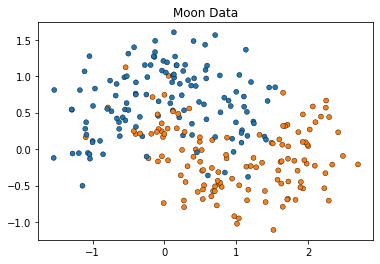

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons

X, y = make_moons(noise=0.324, random_state=42, n_samples=250)
sns.scatterplot(x=X[:, 0], y=X[:, 1], 
                hue=y, marker="o", s=25, 
                edgecolor="k", legend=False).set_title("Moon Data")
plt.show()

2. scikit-learn 패키지로 결정트리를 구현해보겠습니다.

    `DecisionTreeClassifier` 분류기를 사용합니다. [scikit-learn DecisionTreeClassifier documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontreeclassifier#sklearn.tree.DecisionTreeClassifier)

In [68]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

3. 데이터에 `.fit()` 메소드를 호출함으로써 트리를 데이터에 훈련시킵니다.

In [69]:
dt.fit(X, y)

DecisionTreeClassifier()

4. 정확도를 확인해봅니다.

In [70]:
dt.score(X,y)

1.0

5. 완성된 결정트리를 시각화해봅니다.

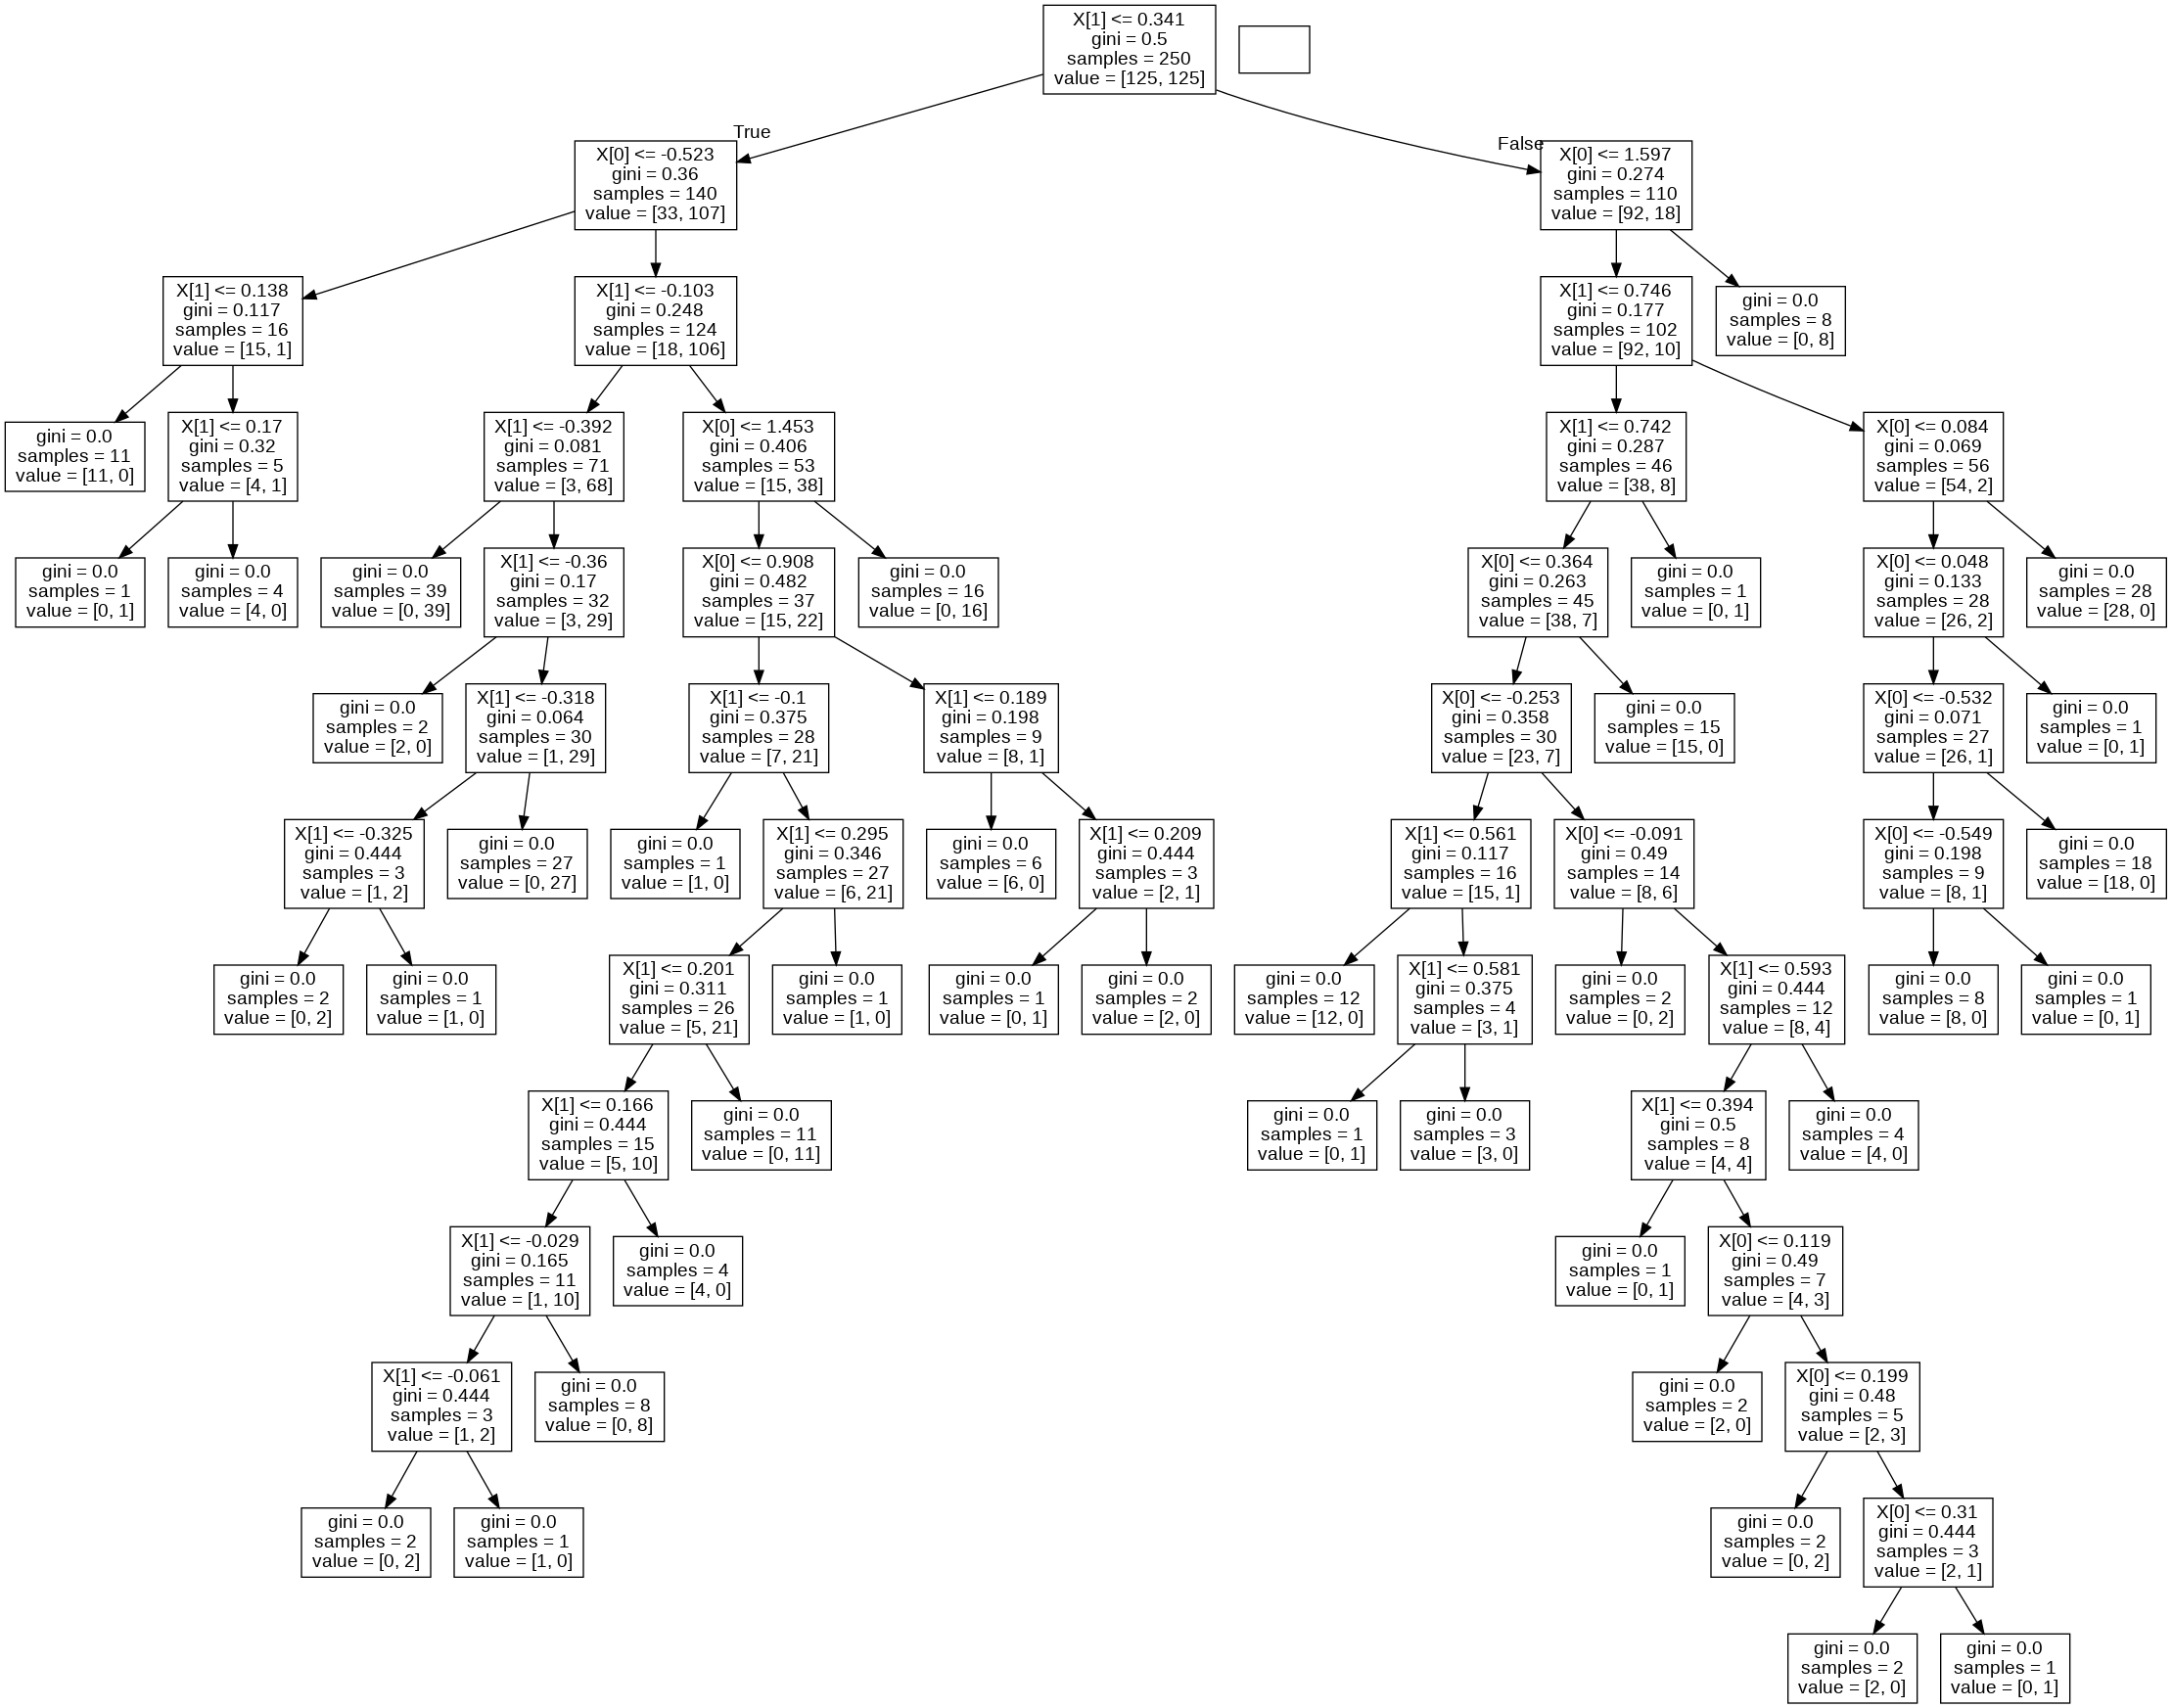

In [71]:
# 아래 코드는 classifier 결정트리를 시각화해줍니다.
from sklearn.tree import export_graphviz # drawing graphs specified in DOT language scripts
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dt, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('/tree.png')
Image(graph.create_png())

6. 결정 경계 또한 시각화 해봅니다.

Text(0.5, 1.0, 'first decision tree')

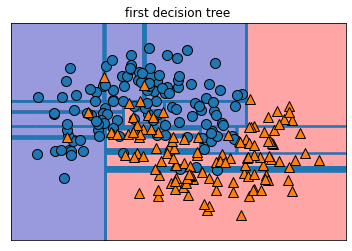

In [72]:
from mglearn import plot_interactive_tree

ax = plot_interactive_tree.plot_tree_partition(X, y, dt)
ax.set_title("first decision tree")

# 활동 6: 결정 트리 가지치기 (pruning)

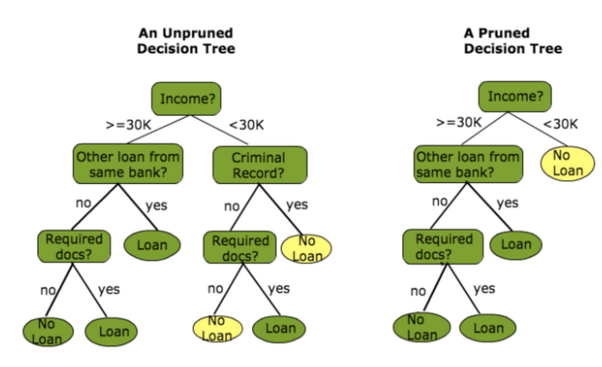

가지치기란 최대트리로 형성된 결정트리의 특정 노드 밑의 하부 트리를 제거하여 **일반화 성능**을 높히는 것을 의미합니다. 모든 끝노드의 불순도가 0인 트리를 full tree라고 하는데, 이 경우에는 분할이 너무 많이 과적합의 위험이 발생합니다. 과적합은 학습 데이터에 과하게 학습하여 실제 데이터에 오차가 증가하는 현상입니다. 이를 방지하기 위해서 적절한 수준에서 끝노드를 결합해주는 기법을 가지치기(pruning)이라고 합니다. 

이 활동에서는 scikit-learn으로 간단한 수준의 가지치기를 구현해보겠습니다. [scikit-learn DecisionTreeClassifier documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

1. 새로운 결정트리를 생성합니다. 이번에는 깊이를 지정해줍니다. 

In [73]:
pruned_dt = DecisionTreeClassifier(max_depth = 3)
pruned_dt.fit(X, y)
print(pruned_dt.score(X, y))

0.884


2. 가지치기된 트리를 시각화 해봅니다.

    이렇게 끝노드의 개수를 지정해주면 트리가 데이터에 더욱 잘 일반화됩니다.

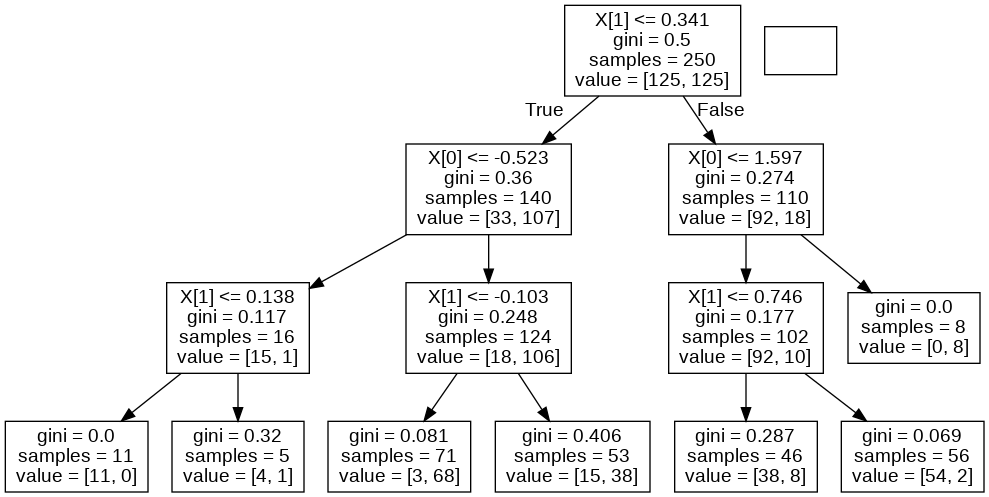

In [74]:
dot_data = StringIO()
export_graphviz(pruned_dt, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('/tree.png')
Image(graph.create_png())

3. 결정 경계 또한 시각화해 비교해봅니다.

Text(0.5, 1.0, 'first decision tree')

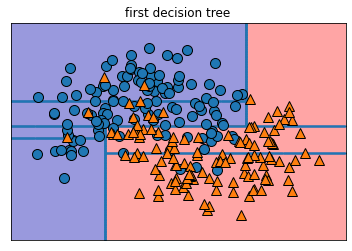

In [75]:
ax = plot_interactive_tree.plot_tree_partition(X, y, pruned_dt)
ax.set_title("first decision tree")

# 과제

Kaggle의 [Titanic](https://www.kaggle.com/c/titanic) 데이터를 사용합니다.

타이타닉 데이터의 feature:
* Pclass: 승객 등급. 1등급=1, 2등급=2, 3등급=3
* Sex: 성별
* Age: 나이
* SibSp: 함께 탑승한 형제 또는 배우자 수
* Parch: 함께 탑승한 부모 또는 자녀 수
* Fare: 여객 운임

Label: Survived 생존=1, 죽음=0

1. 데이터 파악 및 전처리를 진행합니다.

In [40]:
import pandas as pd

data_url = "https://raw.githubusercontent.com/inikoreaackr/ml_datasets/main/titanic.csv"
data = pd.read_csv(data_url)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [76]:
data.columns

data = data[['Survived', 'Pclass', 'Sex', 'Age',
             'SibSp', 'Parch', 'Fare']]
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [77]:
data = data.dropna()

In [78]:
data.shape

(714, 7)

In [79]:
data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
dtype: object

In [80]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data.Sex = le.fit_transform(data.Sex)

In [81]:
data.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
dtype: object

In [82]:
y = data[['Survived']]
X = data.drop(columns=['Survived'])

기계학습 모델을 훈련시키고 성능을 파악하기 위해서는 데이터를 훈련 데이터와 테스트 데이터로 나누어야 합니다.

<img src=https://upload.wikimedia.org/wikipedia/commons/b/bb/ML_dataset_training_validation_test_sets.png width=500px>


scikit-learn에서 지원하는 train_test_split 을 사용합니다. [scikit-learn train_test_split documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

2. `DecisionTreeClassifier` 분류기를 사용해 결정트리를 만듭니다.

In [84]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
print(dt.score(X_test, y_test))

0.7348837209302326


3. 트레이팅 데이터에 `.fit()` 메소드를 호출함으로써 트리를 데이터에 훈련시킵니다. `.fit()`메소드는 `training_points`와 `training_labels`을 파라미터로 받습니다.

4. `testing_points`와 `testing_labels`에 대한 결정 트리의 정확도(`.score()`)를 구해보고 출력해봅니다.

5. 훈련된 트리를 시각화해봅니다.

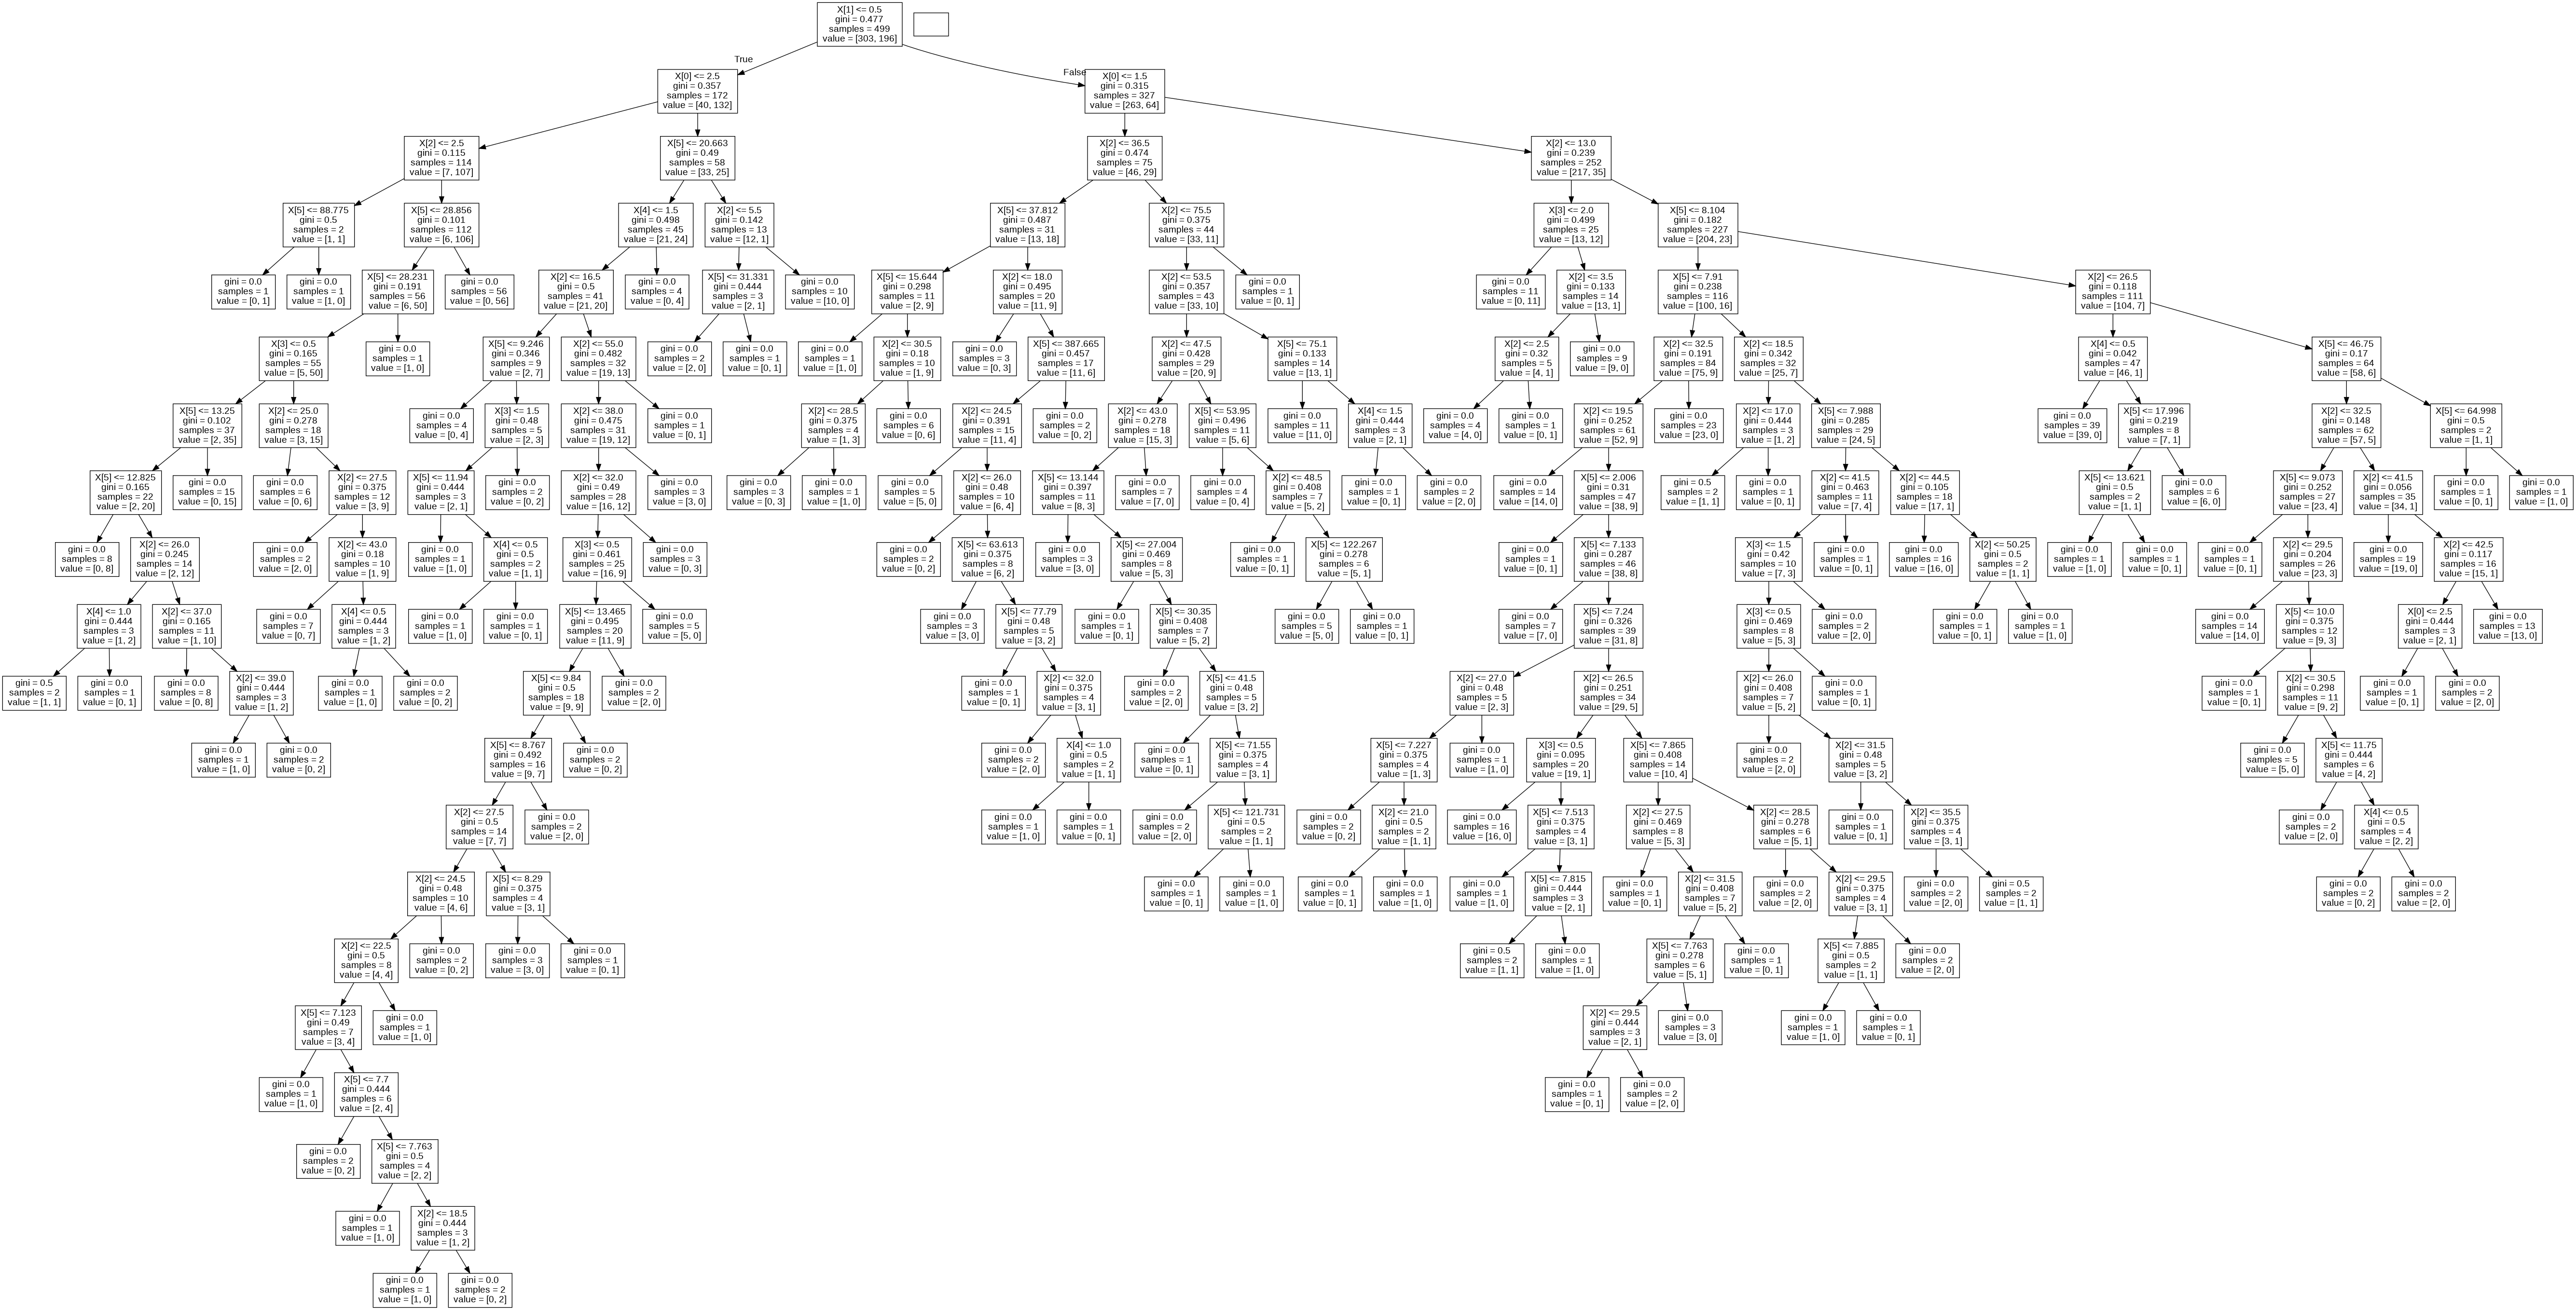

In [85]:
dot_data = StringIO()
export_graphviz(dt , out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('/tree.png')
Image(graph.create_png())

[scikit-learn DecisionTreeClassifier documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

* 과제 1: 

    위 제공된 링크의 `DecisionTreeClassifier` 다큐멘테이션을 읽고 `max_leaf_nodes`, `max_depth`, `min_sample_split`, `min_sample_leaf`, `min_impurity_decrease` 각각의 파라미터가 pruning에 있어서 어떤 역할을 하는지 간단히 설명하시오.

* 과제 2: 

    scikit-learn의 `DecisionTreeClassifier`을 사용하여 총 5개의 새로운 결정트리 모델을 생성해봅시다. 
    
    이 때 각각의 결정트리 모델은 `max_leaf_nodes`, `max_depth`, `min_sample_split`, `min_sample_leaf`, `min_impurity_decrease`의 다섯 pruning 파라미터 중 하나씩을 임의로 조정해주어야 합니다.(하나의 결정 트리는 하나의 pruning 파라미터만 조정하면 되고, 각각의 결정트리는 서로 다른 파라미터를 조정해야합니다.)
    
    결정트리는 훈련 데이터에 fit 되어야 합니다.

* 과제 3: 

    pruning 파라미터를 조정한 5개의 결정트리에 대해 테스트셋에 대한 분류 정확도를 확인해보고, pruning 파라미터를 조정하지 않았던 결정트리의 분류 정확도와 비교해봅시다.


* 과제 4:

    생성된 5개의 결정트리 모델 각각을 시각화해봅시다. (트리 및 결정 경계 모두)

* 과제 5:

    정확도, 시각화된 트리 및 결정 경계를 바탕으로 어느 결정 트리가 데이터에 가장 적합한, 혹은 가장 일반화를 뛰어나게 실행하는 모델인지 서술합니다.

# 실습 2차시 설문 조사

실습 과제를 모두 마친 후 설문에 참여해주세요. \
링크: https://forms.gle/ncHRmnEtHUGfi6Qr8

※설문에 참여해주신 수강생분들 중 다섯 명을 추첨하여 작은 선물을 드릴 예정이오니, 수강생분들의 많은 참여 바랍니다.※